<a href="https://colab.research.google.com/github/akashdasp/Sentiment_analysis/blob/main/Sentiment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv("Asktaols_sentiment_formated.csv",encoding='latin-1')
scraped_df=pd.read_csv("scraped_df.csv",encoding='latin-1')

In [ ]:
df=df.rename(columns={"Liked":"sentiment"})
df

,Reviews,sentiment
0,Wow... Loved this place.,1
1,Stopped by during the late May bank holiday of...,1
2,The selection on the menu was great and so wer...,1
3,The fries were great too.,1
4,A great touch.,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,The whole experience was underwhelming and I t...,0


In [ ]:
scraped_df=scraped_df.drop(columns=["Unnamed: 0","sentiment"])
scraped_df

,Reviews,hugging_face_label
0,Disappointed. Surprisingly disappointed. I hav...,0
1,Food good but waiter should advise patrons on ...,0
2,Recently visited Ballygunge Place restaurant f...,1
3,I was very disapoint that they do not serve ge...,0
4,We visited 6 Ballygunge for a meal this Novemb...,1
...,...,...
674,Group of six of us for a late dinner. Plenty o...,1
675,This weeks dinner special\nShrimp taco\nÃÂ°Ã...,1
676,riseandshine homemade breakfast capecod yummy ...,1
677,"Featuring: Specials, News, Events and More!",1


In [ ]:
scraped_df=scraped_df.rename(columns={"hugging_face_label":"sentiment"})
scraped_df

,Reviews,sentiment
0,Disappointed. Surprisingly disappointed. I hav...,0
1,Food good but waiter should advise patrons on ...,0
2,Recently visited Ballygunge Place restaurant f...,1
3,I was very disapoint that they do not serve ge...,0
4,We visited 6 Ballygunge for a meal this Novemb...,1
...,...,...
674,Group of six of us for a late dinner. Plenty o...,1
675,This weeks dinner special\nShrimp taco\nÃÂ°Ã...,1
676,riseandshine homemade breakfast capecod yummy ...,1
677,"Featuring: Specials, News, Events and More!",1


In [ ]:
df=pd.concat([df,scraped_df])
df

,Reviews,sentiment
0,Wow... Loved this place.,1
1,Stopped by during the late May bank holiday of...,1
2,The selection on the menu was great and so wer...,1
3,The fries were great too.,1
4,A great touch.,1
...,...,...
674,Group of six of us for a late dinner. Plenty o...,1
675,This weeks dinner special\nShrimp taco\nÃÂ°Ã...,1
676,riseandshine homemade breakfast capecod yummy ...,1
677,"Featuring: Specials, News, Events and More!",1


In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    1679 non-null   object
 1   sentiment  1679 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [ ]:
print(f"There is {df.duplicated().sum()} duplicated Reviews in the DataFrame")

There is 243 duplicated Reviews in the DataFrame


In [ ]:
df=df.drop_duplicates(keep="first")

In [ ]:
df.isnull().sum()

Reviews      0
sentiment    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1678
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    1436 non-null   object
 1   sentiment  1436 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.7+ KB


In [ ]:
df.sentiment.value_counts()

1    866
0    570
Name: sentiment, dtype: int64

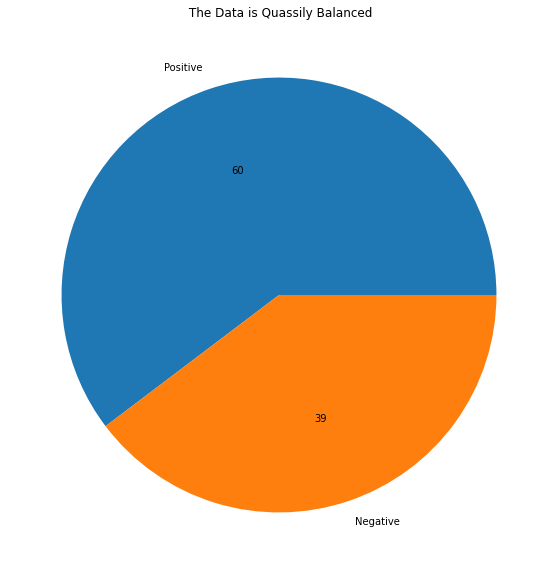

In [ ]:
plt.figure(figsize=(10,10))
plt.title(" The Data is Quassily Balanced")
plt.pie((df.sentiment.value_counts()/df.shape[0])*100,autopct="%d",labels=["Positive","Negative"])
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df["Reviews"].apply(len)

In [ ]:
df

,Reviews,sentiment,num_characters
0,Wow... Loved this place.,1,24
1,Stopped by during the late May bank holiday of...,1,87
2,The selection on the menu was great and so wer...,1,59
3,The fries were great too.,1,25
4,A great touch.,1,14
...,...,...,...
1674,Group of six of us for a late dinner. Plenty o...,1,156
1675,This weeks dinner special\nShrimp taco\nÃÂ°Ã...,1,244
1676,riseandshine homemade breakfast capecod yummy ...,1,160
1677,"Featuring: Specials, News, Events and More!",1,43


In [ ]:
df['num_words']=df["Reviews"].apply((lambda x:nltk.word_tokenize(x))).apply(len)

In [ ]:
df

,Reviews,sentiment,num_characters,num_words
0,Wow... Loved this place.,1,24,6
1,Stopped by during the late May bank holiday of...,1,87,16
2,The selection on the menu was great and so wer...,1,59,13
3,The fries were great too.,1,25,6
4,A great touch.,1,14,4
...,...,...,...,...
1674,Group of six of us for a late dinner. Plenty o...,1,156,34
1675,This weeks dinner special\nShrimp taco\nÃÂ°Ã...,1,244,40
1676,riseandshine homemade breakfast capecod yummy ...,1,160,20
1677,"Featuring: Specials, News, Events and More!",1,43,10


In [ ]:
df['sentence_count']=df["Reviews"].apply((lambda x:nltk.sent_tokenize(x))).apply(len)

In [ ]:
df

,Reviews,sentiment,num_characters,num_words,sentence_count
0,Wow... Loved this place.,1,24,6,2
1,Stopped by during the late May bank holiday of...,1,87,16,1
2,The selection on the menu was great and so wer...,1,59,13,1
3,The fries were great too.,1,25,6,1
4,A great touch.,1,14,4,1
...,...,...,...,...,...
1674,Group of six of us for a late dinner. Plenty o...,1,156,34,3
1675,This weeks dinner special\nShrimp taco\nÃÂ°Ã...,1,244,40,1
1676,riseandshine homemade breakfast capecod yummy ...,1,160,20,1
1677,"Featuring: Specials, News, Events and More!",1,43,10,1


In [ ]:
df.iloc[:,2:].describe()


,num_characters,num_words,sentence_count
count,1436.000000,1436.000000,1436.000000
mean,96.211699,19.448468,1.608635
std,79.304976,15.262379,1.263272
min,9.000000,1.000000,1.000000
25%,38.000000,8.000000,1.000000
50%,68.000000,14.000000,1.000000
75%,125.250000,25.000000,1.000000
max,581.000000,108.000000,10.000000


- OutCome of this Analysis

1.  58 numbers of Character Has been used for giving the reviews
2.  most of the people has gave the Reviw with in one Sentence
3. Maximum two Sentence has been used for giving the Reviws



In [ ]:
df[df["sentiment"]==0][["num_characters","num_words",'sentence_count']].describe()

,num_characters,num_words,sentence_count
count,570.000000,570.000000,570.00000
mean,79.426316,16.607018,1.27193
std,62.707923,12.292279,0.84974
min,11.000000,3.000000,1.00000
25%,36.250000,8.000000,1.00000
50%,60.000000,13.000000,1.00000
75%,100.000000,21.000000,1.00000
max,276.000000,57.000000,6.00000


☹ People Did't Like Anlysis
1. people used arround 13 word to desribe the Reviws
2. People used arround 1 and maximum 2 sentence to give the Review
3. people used arround 60 characters to desribe the Reviws 

In [ ]:
df[df["sentiment"]==1][["num_characters","num_words",'sentence_count']].describe()

,num_characters,num_words,sentence_count
count,866.000000,866.000000,866.000000
mean,107.259815,21.318707,1.830254
std,86.828144,16.679988,1.431296
min,9.000000,1.000000,1.000000
25%,39.250000,9.000000,1.000000
50%,76.000000,15.500000,1.000000
75%,148.750000,29.000000,2.000000
max,581.000000,108.000000,10.000000


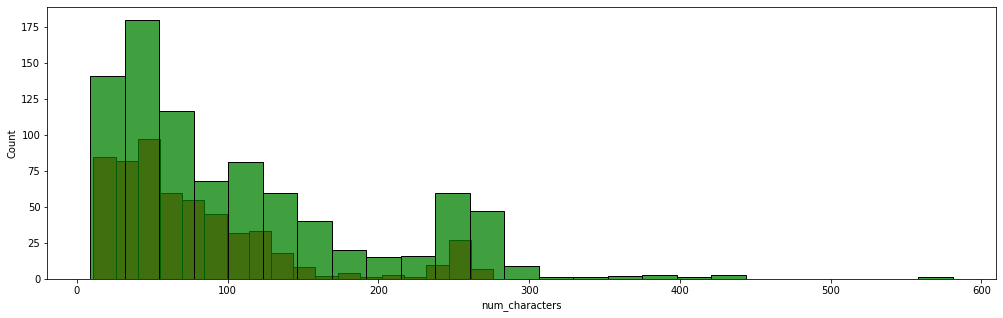

In [ ]:
plt.figure(figsize=(17,5))
sns.histplot(df[df["sentiment"]== 0]["num_characters"],color='r',legend="DisLiked")
sns.histplot(df[df["sentiment"]== 1]["num_characters"],color="g",legend="Liked")

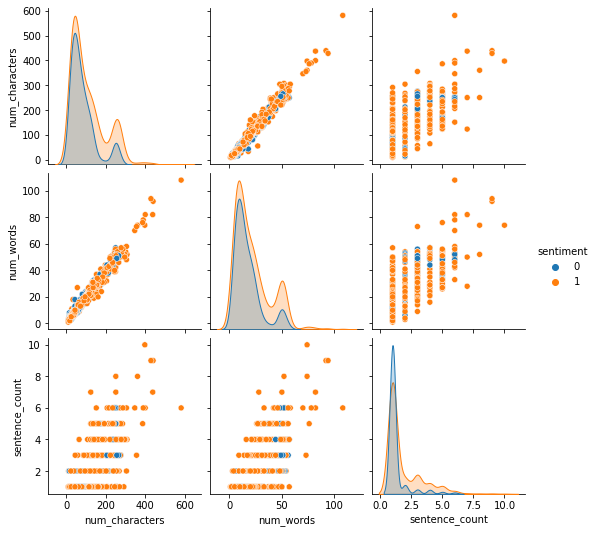

In [ ]:
sns.pairplot(df,hue="sentiment")

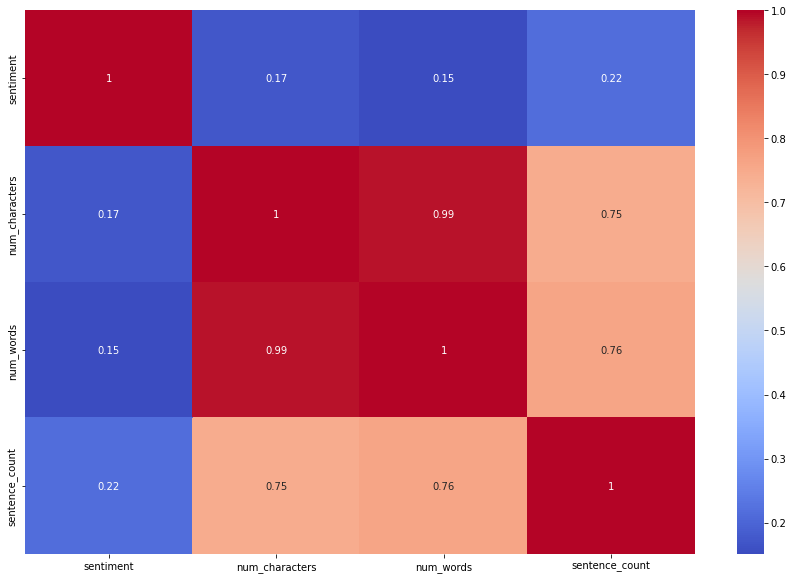

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

# 3 Data Preprocessing
- Lower case
- Tokenization
- Removing Special characters
- Removing stop Words and Puctuation
- Stemming

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
''' This Fuction Will do 1.Lowering then it will do the 2.Tokenization,
    then it Separate the AlphaNumeric Charecter means 
    3.Punctuation Remove  then at the Last it does 
    the 4.Stemming Which Means getting the Core Word Structure
''' 
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i  not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text("is this is a good Customer Reviwing")

'good custom reviw'

In [ ]:
df["transformed_text"]=df["Reviews"].apply(transform_text)

In [ ]:
df

,Reviews,sentiment,num_characters,num_words,sentence_count,transformed_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
2,The selection on the menu was great and so wer...,1,59,13,1,select menu great price
3,The fries were great too.,1,25,6,1,fri great
4,A great touch.,1,14,4,1,great touch
...,...,...,...,...,...,...
1674,Group of six of us for a late dinner. Plenty o...,1,156,34,3,group six us late dinner plenti menu option se...
1675,This weeks dinner special\nShrimp taco\nÃÂ°Ã...,1,244,40,1,week dinner special shrimp taco crispi fri shr...
1676,riseandshine homemade breakfast capecod yummy ...,1,160,20,1,riseandshin homemad breakfast capecod yummi co...
1677,"Featuring: Specials, News, Events and More!",1,43,10,1,featur special news event


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=2000, height=1500, stopwords=stopwords.words('english'), background_color='black', colormap='Set2', collocations=False, random_state=2023)

In [ ]:
liked_wc=wc.generate(df[df["sentiment"]== 1]["transformed_text"].str.cat(sep=' '))

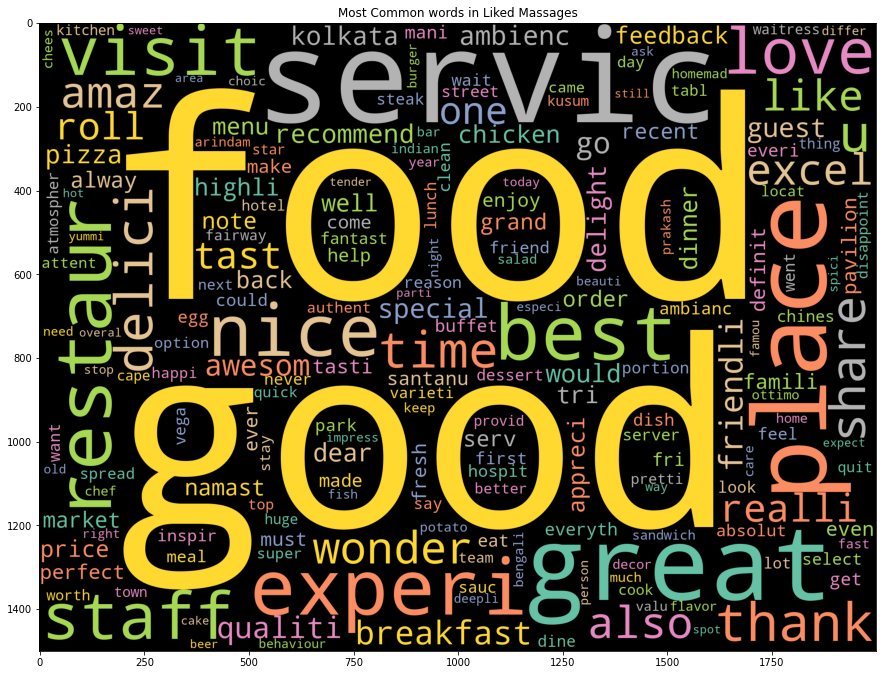

In [ ]:
plt.figure(figsize=(15,20))
plt.imshow(liked_wc)
plt.title("Most Common words in Liked Massages")
plt.show()

In [ ]:
disliked_wc=wc.generate(df[df["sentiment"]== 0]["transformed_text"].str.cat(sep=' '))

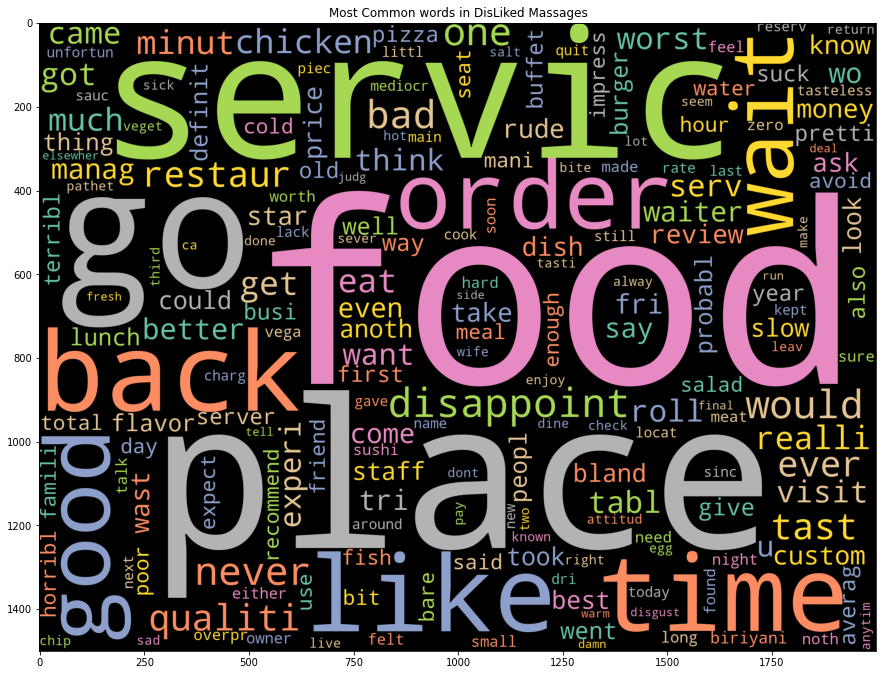

In [ ]:
plt.figure(figsize=(15,20))
plt.imshow(disliked_wc)
plt.title("Most Common words in DisLiked Massages")
plt.show()

In [ ]:
#Example of preprocessing 


print(df.iloc[1][0]+'after processing------->'+df.iloc[1][-1])

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.after processing------->stop late may bank holiday rick steve recommend love


# Model building


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer(max_features=2000)


In [ ]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
X.shape

(1436, 2000)

In [ ]:
y=df["sentiment"].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))


Accuracy_score: 0.7013888888888888
Confusion Matrix:
 [[ 87  28]
 [ 58 115]]
Precision_Score: 0.8041958041958042
F1_score: 0.7278481012658227


In [ ]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))


Accuracy_score: 0.8020833333333334
Confusion Matrix:
 [[ 64  51]
 [  6 167]]
Precision_Score: 0.7660550458715596
F1_score: 0.8542199488491048


In [ ]:
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))


Accuracy_score: 0.84375
Confusion Matrix:
 [[ 95  20]
 [ 25 148]]
Precision_Score: 0.8809523809523809
F1_score: 0.8680351906158357


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))


Accuracy_score: 0.8402777777777778
Confusion Matrix:
 [[ 97  18]
 [ 28 145]]
Precision_Score: 0.8895705521472392
F1_score: 0.863095238095238


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))


Accuracy_score: 0.8541666666666666
Confusion Matrix:
 [[ 86  29]
 [ 13 160]]
Precision_Score: 0.8465608465608465
F1_score: 0.8839779005524862


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))


Accuracy_score: 0.7743055555555556
Confusion Matrix:
 [[ 86  29]
 [ 36 137]]
Precision_Score: 0.8253012048192772
F1_score: 0.808259587020649


In [ ]:
#using the Boosting Algorithm
from xgboost import XGBClassifier
xg=XGBClassifier()

In [ ]:
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))


Accuracy_score: 0.7986111111111112
Confusion Matrix:
 [[100  15]
 [ 43 130]]
Precision_Score: 0.896551724137931
F1_score: 0.8176100628930817


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostClassifier

In [ ]:
cat=CatBoostClassifier(verbose=False)
cat.fit(X_train,y_train)
y_pred=cat.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))



Accuracy_score: 0.8194444444444444
Confusion Matrix:
 [[ 96  19]
 [ 33 140]]
Precision_Score: 0.8805031446540881
F1_score: 0.8433734939759037


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout

voc_size=3000

In [ ]:
corpus=df["transformed_text"].tolist()
corpus[0]

'wow love place'

In [ ]:
len(set(corpus))

1419

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[359, 2007, 278],
 [2286, 778, 106, 994, 2144, 991, 2960, 616, 2007],
 [2487, 1909, 1242, 403],
 [2967, 1242],
 [1242, 2345],
 [1113, 1159],
 [1897, 634, 1911, 1803, 2970, 401, 2989],
 [1796, 616],
 [1158, 1878],
 [1113, 1801, 740],
 [2776, 1164, 112, 721, 2652],
 [2544],
 [1154, 1877, 284, 1474, 1156, 1537, 2832],
 [1229, 1739, 1242, 931, 20, 2291, 1173, 309],
 [1801, 811, 1043, 118, 2967, 2221, 1422, 2923, 434],
 [996, 278, 2765, 2776, 2560],
 [2685, 1043, 278, 2348],
 [2954, 417, 2058, 1102],
 [409, 236, 2832, 403],
 [179, 2207, 551, 1116],
 [2170, 299, 1256],
 [269, 1873, 407, 915, 742, 1242, 1113],
 [2946, 1043, 2604, 515, 1199, 1189],
 [118, 2832, 2299, 1523, 1154],
 [2645, 1044, 2132, 1624],
 [413, 2990, 2191, 2990, 2036, 83, 2692, 1694, 83],
 [2720, 1070, 128, 1153, 299, 60, 1158, 480, 2056],
 [375, 2096, 2056, 1400, 1504, 2126, 2470, 2366],
 [983, 172, 2832],
 [236, 312],
 [2007, 1173, 407, 1242, 1158, 2676, 2469, 1909],
 [2191, 1154, 2232, 320, 693, 1162, 424, 1523],
 [278, 

### Embedding Representation

In [ ]:

sent_length=40
embeded_docs=pad_sequences(onehot_repr,padding="pre",maxlen=sent_length)
embeded_docs

array([[   0,    0,    0, ...,  359, 2007,  278],
       [   0,    0,    0, ..., 2960,  616, 2007],
       [   0,    0,    0, ..., 1909, 1242,  403],
       ...,
       [   0,    0,    0, ..., 2651, 1081, 2915],
       [   0,    0,    0, ..., 2420, 2610, 2534],
       [   0,    0,    0, ..., 1121, 2135, 2919]], dtype=int32)

In [ ]:

len(embeded_docs[2])

40

#### Creating LSTM model

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 40)            120000    
                                                                 
 dropout (Dropout)           (None, 40, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 200)               192800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
embeded_docs.shape,df['sentiment'].shape

((1436, 40), (1436,))

In [ ]:
X_final=np.array(embeded_docs)
y_final=np.array(df['sentiment'])
y_final

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=42)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,)

Epoch 1/50
16/16 [==============================] - 24s 683ms/step - loss: 0.6740 - accuracy: 0.6030 - val_loss: 0.6933 - val_accuracy: 0.5986
Epoch 2/50
16/16 [==============================] - 8s 503ms/step - loss: 0.6312 - accuracy: 0.6239 - val_loss: 0.9383 - val_accuracy: 0.5986
Epoch 3/50
16/16 [==============================] - 6s 398ms/step - loss: 0.6215 - accuracy: 0.6816 - val_loss: 0.6299 - val_accuracy: 0.6357
Epoch 4/50
16/16 [==============================] - 7s 470ms/step - loss: 0.5517 - accuracy: 0.7194 - val_loss: 0.6093 - val_accuracy: 0.6520
Epoch 5/50
16/16 [==============================] - 5s 315ms/step - loss: 0.4745 - accuracy: 0.7731 - val_loss: 0.5511 - val_accuracy: 0.6937
Epoch 6/50
16/16 [==============================] - 5s 308ms/step - loss: 0.3903 - accuracy: 0.8348 - val_loss: 0.5150 - val_accuracy: 0.7239
Epoch 7/50
16/16 [==============================] - 5s 292ms/step - loss: 0.3107 - accuracy: 0.8826 - val_loss: 0.5009 - val_accuracy: 0.7517
Epoch

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.where(y_pred >0.5,1,0)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision_Score:",precision_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))



14/14 [==============================] - 1s 34ms/step
Accuracy_score: 0.7703016241299304
Confusion Matrix:
 [[119  54]
 [ 45 213]]
Precision_Score: 0.797752808988764
F1_score: 0.8114285714285714


In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(xg,open("model.pkl","wb"))

In [ ]:
config=xg.save_model("model")

In [ ]:
print(config)

None


In [ ]:
xg.load_config(config)

AttributeError: ignored

In [ ]:
xg.save_model('model.json',)

In [ ]:
with open("model.json", "rb") as f:
    data = json.load(f, encoding='utf-32-be')

UnicodeDecodeError: ignored

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(xg, f)


In [ ]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
model

XGBClassifier(missing=nan)

In [ ]:
with open('model.pkl', 'wb', encoding='utf-8') as f:
    pickle.dump(model, f)

ValueError: ignored

In [ ]:
with open('model.pkl', 'rb', encoding='utf-8') as f:
    model = pickle.load(f)
model

ValueError: ignored

In [ ]:
pickle.dump(cat,open("model_cat.pkl","wb"))